In [47]:
import xarray as xr
import seaborn as sns
import numpy as np
import matplotlib as plt

### Analyze spiking profile depending on feedback type and brain region

In [2]:
dset = xr.load_dataset('data/steinmetz_2017-11-01_Forssmann.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 359, time: 250, cell: 1769,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 13, spike_id: 3485977)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1765 1766 1767 1768 1769
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'DG' 'LGd' 'SUB' ... 'LSr' 'MOs'
  * spike_id            (spike_id) int32 1 2 3 4 ... 3485975 3485976 3485977
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 0 0 50 25 25 100 0 0 ... 0 100 0 0 100 0 0
    contrast_right      (trial) int8 100 50 25 100 100 100 ... 100 25 100 100 25
    gocue               (trial) float64 0.7917 0.7082 0.4178 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 -1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.09 1.002 0.5842 0.5695 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... 0....
    waveform_u          (cell, waveform_component, probe) float32 0.008219 .....
    lfp                 (brain_area_lfp, trial, time) float64 -5.845 ... 10.82
    spike_time          (spike_id) float32 1.144 1.147 1.149 ... 0.8945 1.742
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1769 1769 1769 1769 1769
    spike_trial         (spike_id) uint32 1 1 1 1 1 1 ... 358 358 359 359 359
Attributes:
    session_date:  2017-11-01
    mouse:         Forssmann
    stim_onset:    0.5
    bin_size:      0.01

In [17]:
spike_data = dset.spike_time.to_dataframe()
spike_data['spike_cell'] = dset['spike_cell']
spike_data['spike_trial'] = dset['spike_trial']
spike_data

,spike_time,spike_cell,spike_trial
spike_id,,,
1,1.144019,1,1
2,1.146752,1,1
3,1.149352,1,1
4,1.154485,1,1
5,1.161752,1,1
...,...,...,...
3485973,1.938831,1769,358
3485974,2.197265,1769,358
3485975,0.033812,1769,359


In [22]:
cell_1 = spike_data['spike_time'][(spike_data['spike_cell'] == 1) & (spike_data['spike_trial'] == 1)]
len(cell_1)

10

In [33]:
trials = np.arange(1, (len(dset.sel(trial=dset.trial[dset.feedback_type < 2])["feedback_type"])+1))
trials


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [38]:
spike_count = []
for trial_idx in trials:
    cell_1 = spike_data['spike_time'][(spike_data['spike_cell'] == 1) & (spike_data['spike_trial'] == trial_idx)]
    spike_count.append(len(cell_1))

spike_count

[10,
 1,
 0,
 2,
 53,
 5,
 4,
 12,
 0,
 0,
 2,
 0,
 3,
 8,
 0,
 7,
 2,
 9,
 12,
 15,
 2,
 6,
 6,
 1,
 2,
 3,
 28,
 4,
 2,
 0,
 1,
 2,
 2,
 3,
 0,
 3,
 17,
 2,
 2,
 3,
 5,
 8,
 5,
 5,
 4,
 4,
 23,
 8,
 3,
 0,
 2,
 0,
 3,
 30,
 12,
 1,
 0,
 2,
 5,
 4,
 3,
 0,
 2,
 3,
 0,
 3,
 5,
 3,
 2,
 3,
 3,
 2,
 5,
 4,
 6,
 2,
 5,
 5,
 2,
 4,
 1,
 7,
 5,
 2,
 3,
 2,
 2,
 0,
 3,
 0,
 5,
 6,
 0,
 0,
 0,
 1,
 1,
 0,
 6,
 3,
 3,
 0,
 6,
 4,
 2,
 0,
 6,
 5,
 2,
 5,
 1,
 5,
 0,
 1,
 3,
 1,
 3,
 1,
 1,
 6,
 2,
 0,
 2,
 8,
 4,
 2,
 3,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 5,
 5,
 3,
 1,
 2,
 2,
 3,
 6,
 5,
 1,
 11,
 1,
 2,
 6,
 2,
 0,
 3,
 2,
 2,
 0,
 2,
 3,
 20,
 0,
 5,
 1,
 0,
 1,
 1,
 1,
 2,
 3,
 4,
 3,
 0,
 4,
 7,
 9,
 3,
 3,
 5,
 3,
 2,
 3,
 3,
 3,
 3,
 6,
 3,
 4,
 2,
 1,
 2,
 0,
 4,
 1,
 6,
 0,
 4,
 3,
 1,
 7,
 6,
 5,
 1,
 3,
 4,
 0,
 1,
 0,
 0,
 3,
 0,
 4,
 0,
 7,
 4,
 1,
 3,
 1,
 2,
 10,
 0,
 18,
 0,
 3,
 3,
 3,
 1,
 4,
 2,
 4,
 3,
 4,
 2,
 5,
 1,
 8,
 9,
 3,
 3,
 1,
 8,
 5,
 10,
 2,
 3,
 7,
 5,
 3,
 0,
 

In [42]:
feedback = dset.sel(trial=dset.trial[dset.feedback_type < 2])["feedback_type"]

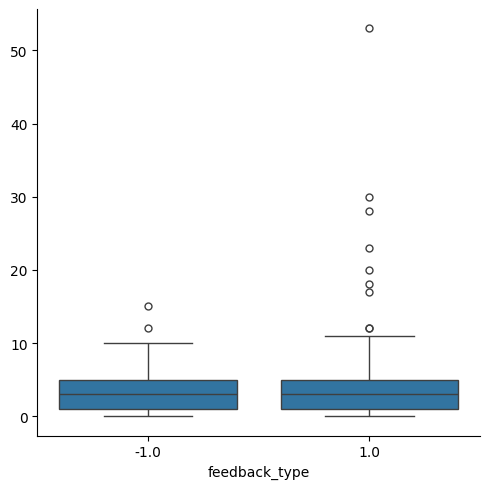

In [51]:
sns.catplot(x=feedback, y=spike_count, kind='box')
